# Importar librerías e inicializar

In [1]:
# Conectar con Google Drive
from google.colab import drive
drive.mount('/content/drive')
base_folder = "/content/drive/MyDrive/00 VIU/10 TFM"

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
from skimage.io import imread
from skimage.color import rgb2hed, hed2rgb
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_datasets as tfds
from PIL import Image


# Análisis de luminosidad de las imágenes

In [3]:
datos_hist_val, datos_hist_train, datos_hist_test = {},{},{}
bucket_size = 32


In [88]:
def analizar_dstf(dstf,nom_archivo_img_bin1, nom_archivo_img_bin6, titl):
  # Collect images and titles to display
  # Crear histograma
  gray_mean = []
  for i,elemento in enumerate(dstf):
      img=elemento['image'].numpy()
      img_gray= np.array(Image.fromarray(img).convert('L'))
      gray_mean.append(int(np.mean(img_gray)))

  metrics_array = np.array(gray_mean)

  #definir grupos para el histograma
  bins = np.arange(0,257,bucket_size)

  counts, bin_edges = np.histogram(metrics_array, bins=bins)

  bucket_counts = {}
  for i in range(len(counts)):
      bucket_counts[int(bin_edges[i])] = counts[i]

  # Print the bucket counts
  for bucket, count in bucket_counts.items():
      print(f"Bucket {bucket}-{bucket + bucket_size - 1}: {count}")

  # Create and display bar chart for bucket counts
  plt.figure(figsize=(10, 6))
  bars = plt.bar([f"{bucket}-{bucket + bucket_size - 1}" for bucket in bucket_counts.keys()], bucket_counts.values(), width=0.8) # Adjusted width
  plt.xlabel("Rango de luminosidad")
  plt.ylabel("Cantidad de muestras")
  plt.title(f"Histograma de luminosidad -  {titl}")
  plt.xticks(rotation=45, ha='right')
  plt.tight_layout()

  # Add annotations to the bars
  for bar in bars:
      yval = bar.get_height()
      plt.text(bar.get_x() + bar.get_width()/2, yval + 10, yval, ha='center', va='bottom') # Add annotation

  plt.show()

  # Crear listas de imágenes de los grupos con menor y mayor intensidad:
  bin1 = [i for i,intens in enumerate(gray_mean) if intens<32]
  bin6 = [i for i,intens in enumerate(gray_mean) if intens>255-32]
  prc_descrt = ((len(bin6)+len(bin1))/len(gray_mean))
  print(f"Porcentaje bin1 y bin6: {prc_descrt*100}%")

  #Visualizar imagenes bin1
  images_to_display = []
  titles_to_display = []
  max_images = 10

  for i, elemento in enumerate(dstf):
    try:
      indice_fig = bin1.index(i)
      tit = f"Lbl: {str(elemento['label'].numpy())}, Lumin.: {gray_mean[i]}, id:{i}"
      images_to_display.append(elemento['image'].numpy())
      titles_to_display.append(tit)
      if len(images_to_display) >= max_images:
          break

    except ValueError:
      pass

  n_cols = 5
  n_rows = (len(images_to_display) + n_cols - 1) // n_cols

  fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 2, n_rows * 2))
  axes = axes.flatten()

  for i, (img, title) in enumerate(zip(images_to_display, titles_to_display)):
      axes[i].imshow(img)
      axes[i].set_title(title, fontsize=8)
      axes[i].axis('off')

  # Ocultar subplots sobrantes:
  for j in range(i + 1, len(axes)):
      axes[j].axis('off')

  # plt.tight_layout()
  fig.suptitle('Imágenes en el grupo de menor luminosidad '+titl)
  plt.tight_layout()
  plt.savefig(nom_archivo_img_bin1)
  plt.show()


  #Visualizar imagenes bin6
  images_to_display = []
  titles_to_display = []

  for i, elemento in enumerate(dstf):
    try:
      indice_fig = bin6.index(i)
      tit = f"Lbl: {str(elemento['label'].numpy())}, Lumin.: {gray_mean[i]}, id:{i}"
      images_to_display.append(elemento['image'].numpy())
      titles_to_display.append(tit)
      if len(images_to_display) >= max_images:
          break

    except ValueError:
      pass

  n_cols = 5
  n_rows = (len(images_to_display) + n_cols - 1) // n_cols

  fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 2, n_rows * 2))
  axes = axes.flatten()

  for i, (img, title) in enumerate(zip(images_to_display, titles_to_display)):
      axes[i].imshow(img)
      axes[i].set_title(title, fontsize=8)
      axes[i].axis('off')

  # Ocultar subplots sobrantes:
  for j in range(i + 1, len(axes)):
      axes[j].axis('off')

  # plt.tight_layout()
  fig.suptitle('Imágenes en el grupo de mayor luminosidad '+titl)
  plt.tight_layout()
  plt.savefig(nom_archivo_img_bin6)
  plt.show()


  return bucket_counts

## Dataset Validación

Bucket 0-31: 14
Bucket 32-63: 82
Bucket 64-95: 1227
Bucket 96-127: 8809
Bucket 128-159: 10200
Bucket 160-191: 5789
Bucket 192-223: 4779
Bucket 224-255: 1868


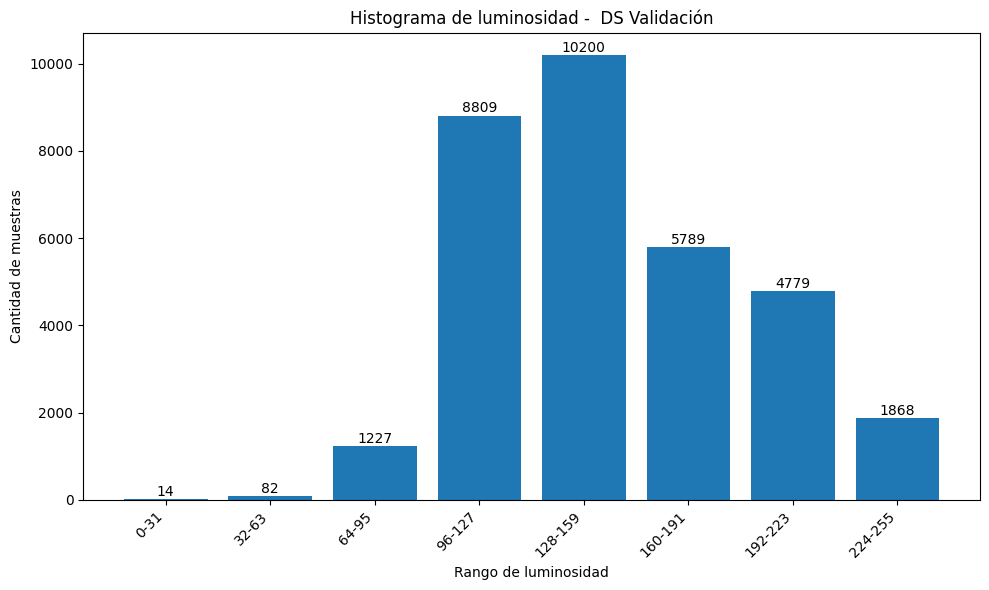

Porcentaje bin1 y bin6: 5.743408203125%


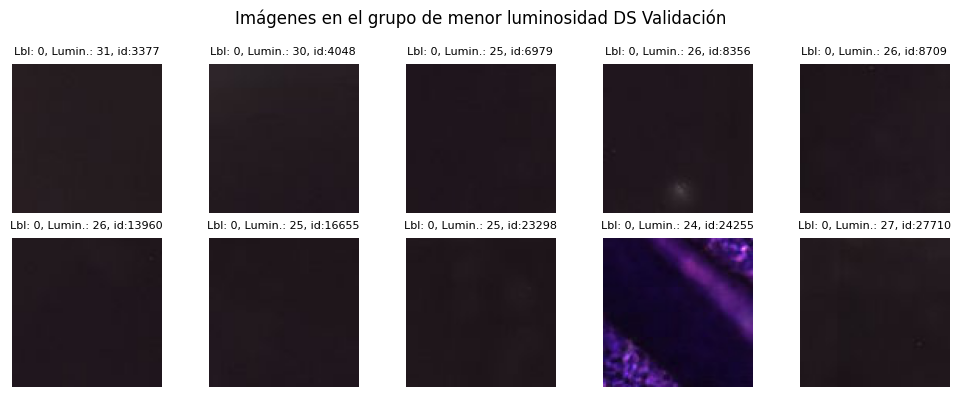

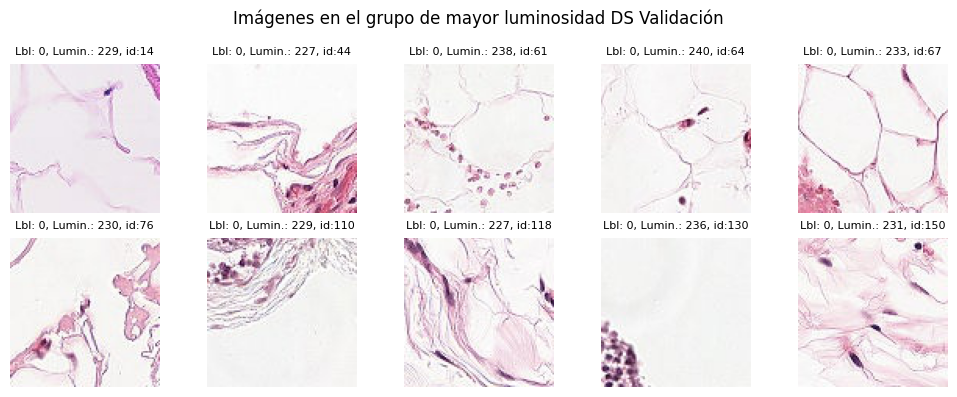

In [89]:
ruta_pcam = base_folder+"/Datasets/pcamelyon_tf/TFcamelyon_val"
dstf = tf.data.Dataset.load(ruta_pcam)
datos_hist_val = analizar_dstf(dstf,base_folder+"/FIGURES/img_bin1_val.png",base_folder+"/FIGURES/img_bin6_val.png","DS Validación")

## Datset de pruebas

Bucket 0-31: 15
Bucket 32-63: 52
Bucket 64-95: 2219
Bucket 96-127: 9617
Bucket 128-159: 9104
Bucket 160-191: 5079
Bucket 192-223: 5000
Bucket 224-255: 1682
Porcentaje bin1 y bin6: 5.1788330078125%


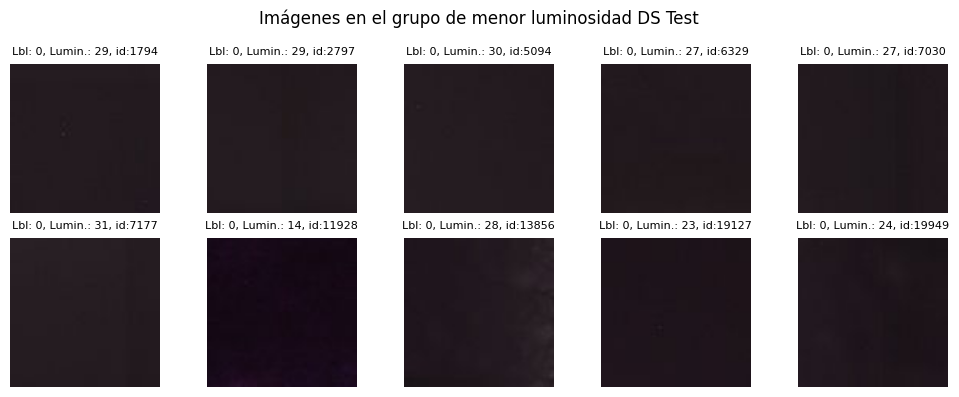

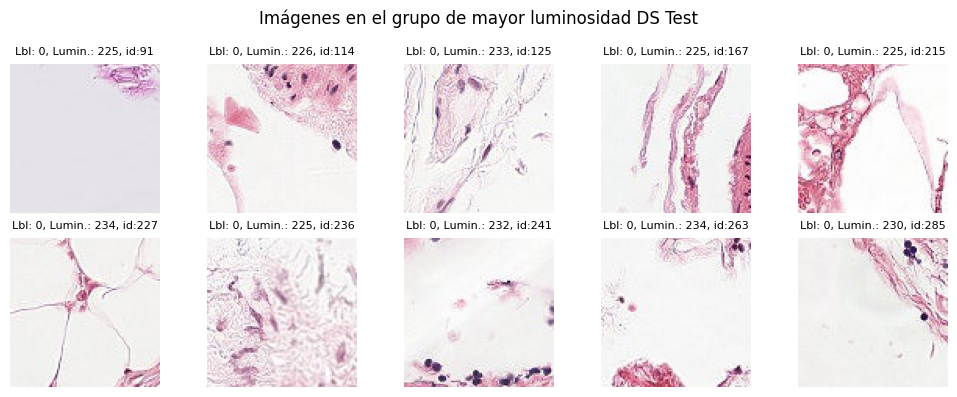

In [ ]:
ruta_pcam = base_folder+"/Datasets/pcamelyon_tf/TFcamelyon_test"
dstf = tf.data.Dataset.load(ruta_pcam)
datos_hist_test = analizar_dstf(dstf,base_folder+"/FIGURES/img_bin1_test.png",base_folder+"/FIGURES/img_bin6_test.png", "DS Test")

## Dataset de entrenamiento

Bucket 0-31: 125
Bucket 32-63: 683
Bucket 64-95: 12690
Bucket 96-127: 66604
Bucket 128-159: 76406
Bucket 160-191: 49945
Bucket 192-223: 39324
Bucket 224-255: 16367
Porcentaje bin1 y bin6: 6.29119873046875%


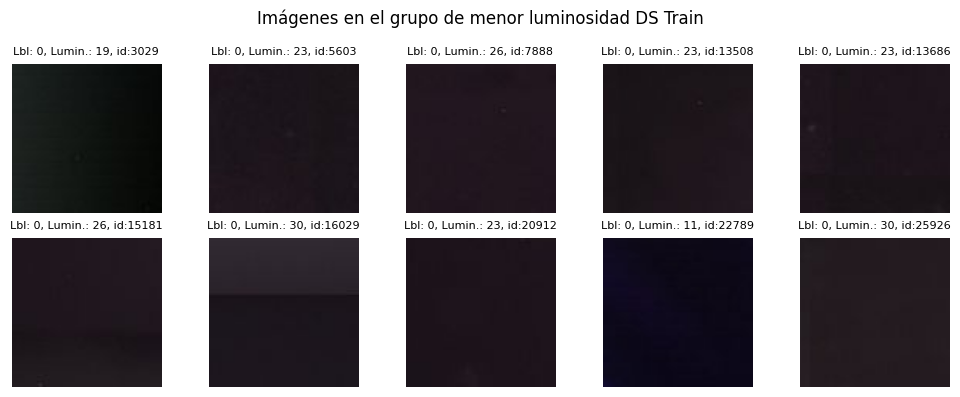

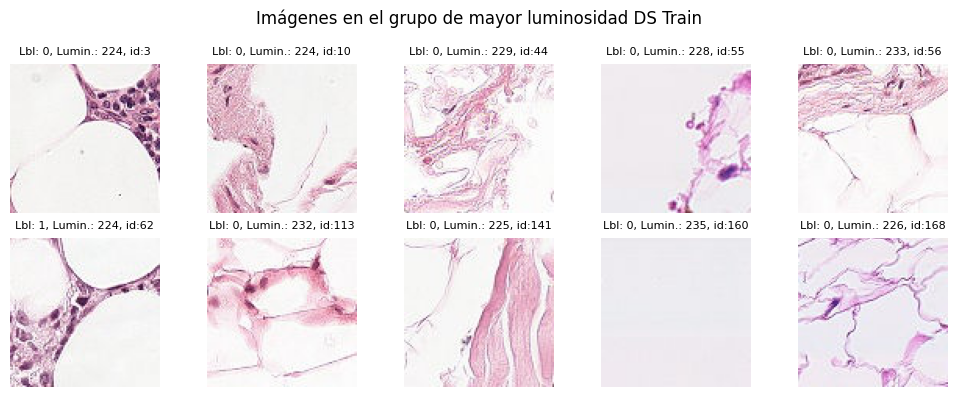

In [ ]:
ruta_pcam = base_folder+"/Datasets/pcamelyon_tf/TFcamelyon_train"
dstf = tf.data.Dataset.load(ruta_pcam)
datos_hist_train =analizar_dstf(dstf,base_folder+"/FIGURES/img_bin1_train.png",base_folder+"/FIGURES/img_bin6_train.png", "DS Train")

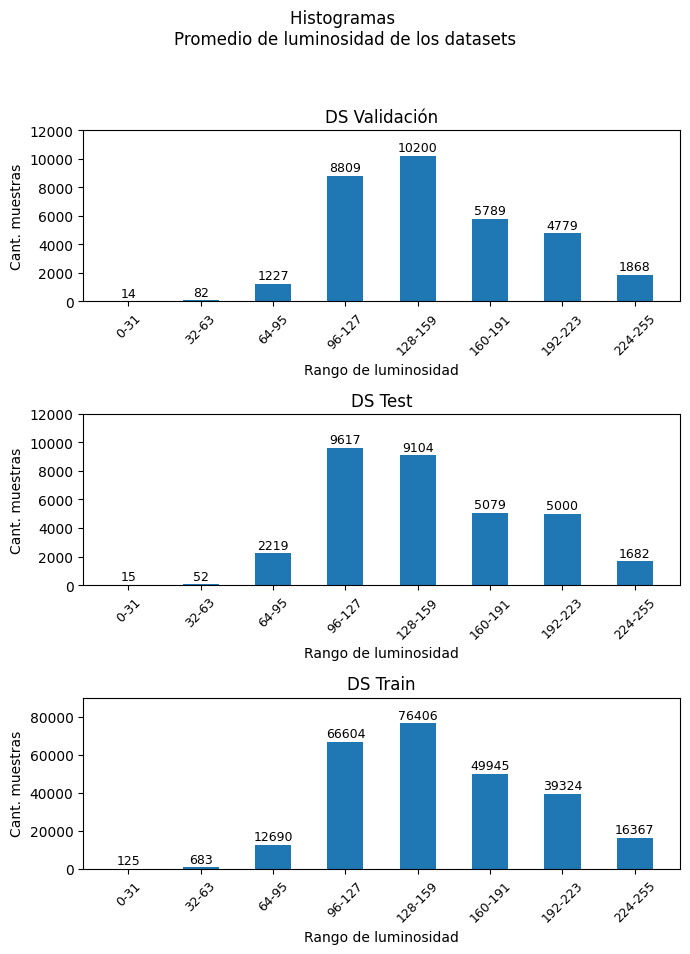

In [ ]:
# Visualizar los histogramas en subplots

fig, axes = plt.subplots(3, 1, figsize=(7, 10)) # Create a figure with 1 row and 3 columns

# Validación:
bars_val = axes[0].bar([str(bucket) + '-' + str(bucket + bucket_size -1) for bucket in datos_hist_val.keys()], datos_hist_val.values(), width=0.5)
axes[0].set_xlabel("Rango de luminosidad")
axes[0].set_ylabel("Cant. muestras")
axes[0].set_title("DS Validación")
axes[0].tick_params(axis='x', rotation=45, labelsize=9)
axes[0].set_ylim(0, 12000)
for bar in bars_val:
    yval = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2, yval + 100, int(yval), ha='center', va='bottom', fontsize=9)


# Test:
bars_test = axes[1].bar([str(bucket) + '-' + str(bucket + bucket_size -1) for bucket in datos_hist_test.keys()], datos_hist_test.values(), width=0.5)
axes[1].set_xlabel("Rango de luminosidad")
axes[1].set_ylabel("Cant. muestras")
axes[1].set_title("DS Test")
axes[1].tick_params(axis='x', rotation=45, labelsize=9)
axes[1].set_ylim(0, 12000)
for bar in bars_test:
    yval = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2, yval + 100, int(yval), ha='center', va='bottom', fontsize=9)

# Training:
bars_train = axes[2].bar([str(bucket) + '-' + str(bucket + bucket_size -1) for bucket in datos_hist_train.keys()], datos_hist_train.values(), width=0.5)
axes[2].set_xlabel("Rango de luminosidad")
axes[2].set_ylabel("Cant. muestras")
axes[2].set_title("DS Train")
axes[2].tick_params(axis='x', rotation=45, labelsize=9)
axes[2].set_ylim(0, 90000)
for bar in bars_train:
    yval = bar.get_height()
    axes[2].text(bar.get_x() + bar.get_width()/2, yval + 1000, int(yval), ha='center', va='bottom', fontsize=9)


fig.suptitle("Histogramas \nPromedio de luminosidad de los datasets", fontsize=12)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig(base_folder+"/FIGURES/hist_luminosidad.png")
plt.show()

# Dispersión por tinción

## Eosina

In [6]:
from skimage.color import rgb2hed, hed2rgb

In [7]:
def obtener_h_e(image_rgb):

    # Convertir de RGB a HED (Hematoxilina, Eosina, DAB)
    image_he = rgb2hed(image_rgb)

    hematoxylin_channel = image_he[:, :, 0]
    eosin_channel = image_he[:, :, 1]

    mean_hematoxylin = np.mean(hematoxylin_channel)
    mean_eosin = np.mean(eosin_channel)

    return mean_hematoxylin, mean_eosin

In [8]:
def analizar_tincion(dstf,nom_archivo_img_bin1, nom_archivo_img_bin6, titl,tincion):
  # Crear histograma
  lst_tincion_h, lst_tincion_e = [],[]
  for i,elemento in enumerate(dstf):
      # plt.imshow(elemento['image'])
      mean_hem, mean_eo = obtener_h_e(elemento['image'])
      lst_tincion_h.append(mean_hem)
      lst_tincion_e.append(mean_eo)

  # metrics_array = np.array(lst_tincion)

  # #definir grupos para el histograma
  # bins = np.arange(0,257,bucket_size)

  # counts, bin_edges = np.histogram(metrics_array, bins=bins)

  # bucket_counts = {}
  # for i in range(len(counts)):
  #     bucket_counts[int(bin_edges[i])] = counts[i]

  # # Print the bucket counts
  # for bucket, count in bucket_counts.items():
  #     print(f"Bucket {bucket}-{bucket + bucket_size - 1}: {count}")

  # # Crear listas de imágenes de los grupos con menor y mayor intensidad:
  # bin1 = [i for i,intens in enumerate(lst_tincion) if intens<32]
  # bin6 = [i for i,intens in enumerate(lst_tincion) if intens>255-32]
  # prc_descrt = ((len(bin6)+len(bin1))/len(lst_tincion))
  # print(f"Porcentaje bin1 y bin6: {prc_descrt*100}%")

  # #Visualizar imagenes bin1
  # images_to_display = []
  # titles_to_display = []
  # max_images = 10

  # for i, elemento in enumerate(dstf):
  #   try:
  #     indice_fig = bin1.index(i)
  #     tit = f"Lbl: {str(elemento['label'].numpy())}, Lumin.: {lst_tincion[i]}, id:{i}"
  #     images_to_display.append(elemento['image'].numpy())
  #     titles_to_display.append(tit)
  #     if len(images_to_display) >= max_images:
  #         break

  #   except ValueError:
  #     pass

  # n_cols = 5
  # n_rows = (len(images_to_display) + n_cols - 1) // n_cols

  # fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 2, n_rows * 2))
  # axes = axes.flatten()

  # for i, (img, title) in enumerate(zip(images_to_display, titles_to_display)):
  #     axes[i].imshow(img)
  #     axes[i].set_title(title, fontsize=8)
  #     axes[i].axis('off')

  # # Ocultar subplots sobrantes:
  # for j in range(i + 1, len(axes)):
  #     axes[j].axis('off')

  # # plt.tight_layout()
  # fig.suptitle('Imágenes en el grupo de menor tinción Hematoxilina'+titl)
  # plt.tight_layout()
  # plt.savefig(nom_archivo_img_bin1)
  # plt.show()


  # #Visualizar imagenes bin6
  # images_to_display = []
  # titles_to_display = []

  # for i, elemento in enumerate(dstf):
  #   try:
  #     indice_fig = bin6.index(i)
  #     tit = f"Lbl: {str(elemento['label'].numpy())}, Hem.: {lst_tincion[i]}, id:{i}"
  #     images_to_display.append(elemento['image'].numpy())
  #     titles_to_display.append(tit)
  #     if len(images_to_display) >= max_images:
  #         break

  #   except ValueError:
  #     pass

  # n_cols = 5
  # n_rows = (len(images_to_display) + n_cols - 1) // n_cols

  # fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 2, n_rows * 2))
  # axes = axes.flatten()

  # for i, (img, title) in enumerate(zip(images_to_display, titles_to_display)):
  #     axes[i].imshow(img)
  #     axes[i].set_title(title, fontsize=8)
  #     axes[i].axis('off')

  # # Ocultar subplots sobrantes:
  # for j in range(i + 1, len(axes)):
  #     axes[j].axis('off')

  # # plt.tight_layout()
  # fig.suptitle('Imágenes en el grupo de mayor tinción Hematoxilina '+titl)
  # plt.tight_layout()
  # plt.savefig(nom_archivo_img_bin6)
  # plt.show()

  return lst_tincion_h, lst_tincion_e

In [9]:
ruta_pcam = base_folder+"/Datasets/pcamelyon_tf/TFcamelyon_val"
dstf = tf.data.Dataset.load(ruta_pcam)
temp_h, temp_e = analizar_tincion(dstf,base_folder+"/FIGURES/img_bin1_val_h.png",base_folder+"/FIGURES/img_bin6_val_h.png",
                                  "DS Validación Hem")

H: 
0.03677934215435488 0.02304561927326877 0.6068407443476795 0.000417356611953975

E: 
0.024794753733380984 0.01688340089267719 0.13988820189042833 0.0

 SUMA: 
0.061574095887735866 0.037870205893722295 0.6175556092974427 0.0010407465062998772
(array([    1,     5,     9, ..., 32761, 32765, 32767]),)
Valores correspondientes:
[0.0085042  0.0150059  0.0158972  ... 0.01925112 0.01811053 0.01896562]


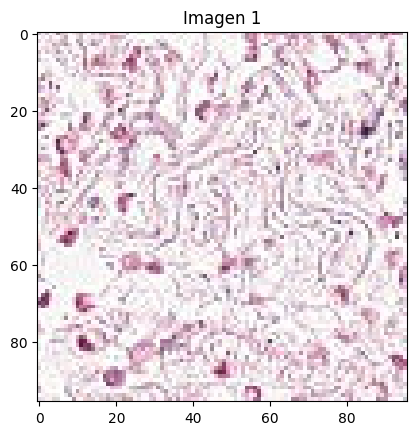

In [10]:
temp_array_h = np.array(temp_h)
temp_array_e = np.array(temp_e)
print("H: ")
print(np.mean(temp_array_h), np.std(temp_array_h), np.max(temp_array_h), np.min(temp_array_h))
print("\nE: ")
print(np.mean(temp_array_e), np.std(temp_array_e), np.max(temp_array_e), np.min(temp_array_e))

temp_array=np.add(temp_array_h,temp_array_e)
print("\n SUMA: ")
print(np.mean(temp_array), np.std(temp_array), np.max(temp_array), np.min(temp_array))

indices_outliers_h = np.where(temp_array_h < 0.02)

print(indices_outliers_h)
print("Valores correspondientes:")
print(temp_array_h[indices_outliers_h])

for i,elemento in enumerate(dstf):
  if i == 1:
      plt.title(f'Imagen {i}')
      plt.imshow(elemento['image'])




In [102]:
#Visualizar un max de imagenes de un dataset, de una lista de índices
def visualizar_imgs(dstf, lista_indices, lista_valores, max_images,macrotitulo):
  titles_to_display,images_to_display, lista_positivos, lista_val_positivos = [],[],[],[]

  # Ensure lista_indices is a flattened list of indices
  if isinstance(lista_indices, tuple):
      lista_indices = lista_indices[0].tolist()
  elif isinstance(lista_indices, np.ndarray):
      lista_indices = lista_indices.tolist()

  # Create a dictionary to easily map indices to values
  valores_dict = dict(zip(lista_indices, lista_valores))

  for i, elemento in enumerate(dstf):
    if i in lista_indices:
        if len(images_to_display) <= max_images:
          staining_value = valores_dict.get(i, 'N/A')
          tit = f"Lbl: {str(elemento['label'].numpy())}, Hem.: {staining_value:.2f}, id:{i}"
          images_to_display.append(elemento['image'].numpy())
          titles_to_display.append(tit)
        else:
          staining_value = valores_dict.get(i, 'N/A')
          if elemento['label'].numpy() == 1:
            lista_positivos.append(i)
            lista_val_positivos.append(staining_value)

  n_cols = 5
  n_rows = (len(images_to_display) + n_cols - 1) // n_cols

  if n_rows == 0:
      print("No images to display for the given indices.")
      return

  fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 2, n_rows * 2))
  axes = axes.flatten()

  for i, (img, title) in enumerate(zip(images_to_display, titles_to_display)):
      axes[i].imshow(img)
      axes[i].set_title(title, fontsize=8)
      axes[i].axis('off')

  # Ocultar subplots sobrantes:
  for j in range(i + 1, len(axes)):
      axes[j].axis('off')

  # plt.tight_layout()
  fig.suptitle(f'Imágenes atípicas por tinción {macrotitulo}')
  plt.tight_layout()
  # plt.savefig(nom_archivo_img_bin6)
  plt.show()
  return lista_positivos, lista_val_positivos

0.011270802002896634
0.036358494795605274
0.023006794177879104
0.02508769279270864


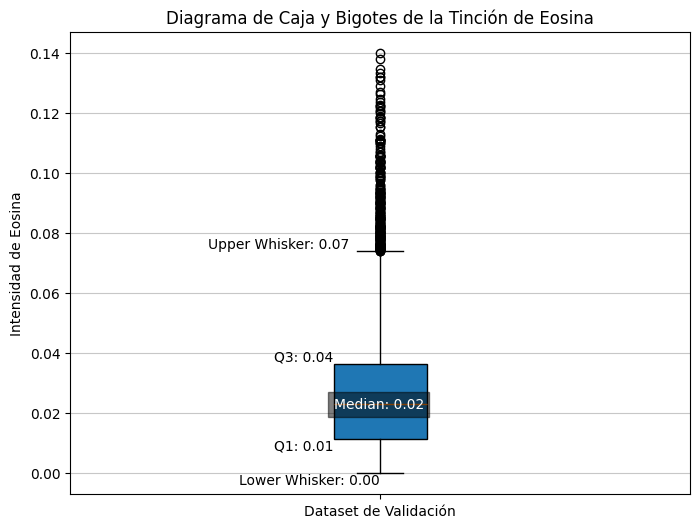

In [103]:
q1=np.percentile(temp_array_e, 25)
print(q1)
q3 = np.percentile(temp_array_e, 75)
print(q3)
mediana = np.median(temp_array_e)
print(mediana)
iqr = q3 - q1
print(iqr)

plt.figure(figsize=(8, 6))
boxplot_dict = plt.boxplot(temp_array_e, patch_artist=True) # Store the boxplot output
plt.title('Diagrama de Caja y Bigotes de la Tinción de Eosina') # Changed title to Eosin
plt.ylabel('Intensidad de Eosina') # Changed label to Eosin
plt.xticks([1], ['Dataset de Validación'])
plt.grid(axis='y', linestyle='-', alpha=0.7)

# Add text annotations for median, quartiles, and whiskers
for line in boxplot_dict['medians']:
    x, y = line.get_xydata()[0]
    plt.text(x, y, f'Median: {y:.2f}', va='center', ha='left', color='white', bbox=dict(facecolor='black', alpha=0.5))

for box in boxplot_dict['boxes']:
    # Get the vertices of the box
    vertices = box.get_path().vertices
    # The vertices correspond to the box corners: (x1, y1), (x2, y1), (x2, y2), (x1, y2)
    # Q1 is the lower y-coordinate, Q3 is the upper y-coordinate
    y1 = vertices[0, 1]
    y2 = vertices[2, 1]
    x = vertices[0, 0] # Use the x-coordinate of the left side of the box

    plt.text(x, y1, f'Q1: {y1:.2f}', va='top', ha='right', color='black')
    plt.text(x, y2, f'Q3: {y2:.2f}', va='bottom', ha='right', color='black')


for i, line in enumerate(boxplot_dict['whiskers']):
    x, y = line.get_xydata()[1] # Get the end point of the whisker
    if i % 2 == 0: # Lower whisker
        plt.text(x, y, f'Lower Whisker: {y:.2f}', va='top', ha='right', color='black')
    else: # Upper whisker
        plt.text(x-0.05, y, f'Upper Whisker: {y:.2f}', va='bottom', ha='right', color='black')
plt.show()


[ 197  292  322  495  569  621 1011 1604 1626 1869]
[0.13791777 0.07979041 0.12245203 0.11546337 0.0791423  0.07992714
 0.09165601 0.08221547 0.08434048 0.08698962]


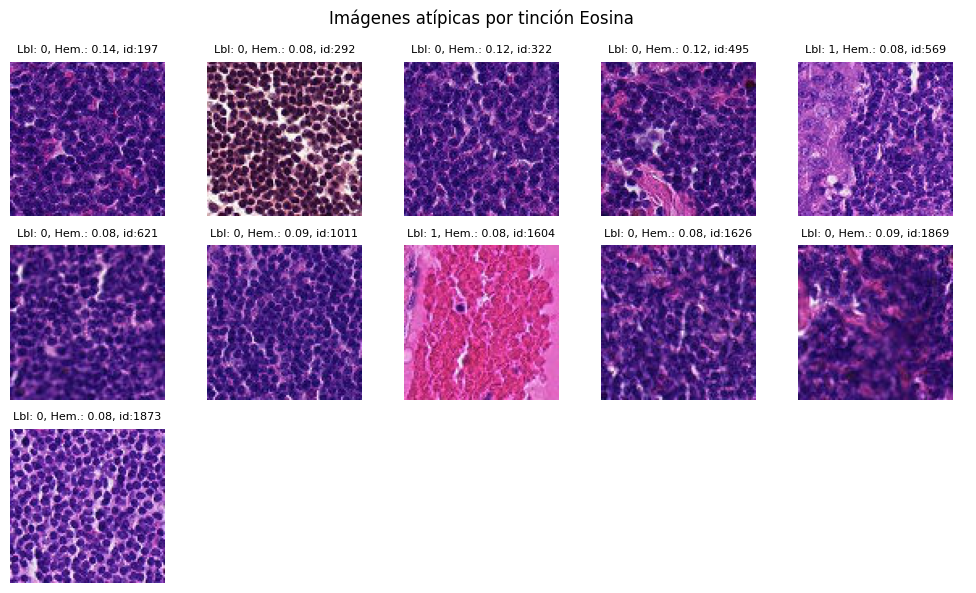

[9056, 9064, 9767, 19193, 23853, 28502]
[np.float64(0.07891508467865933), np.float64(0.08878948706410121), np.float64(0.07516934307906227), np.float64(0.08198873038279059), np.float64(0.0901814954216838), np.float64(0.08272964014054934)]


In [104]:
indices_outliers_e = np.where(temp_array_e > (q3 + 1.5 * iqr))
valores_outliers_e = temp_array_e[indices_outliers_e]
print(indices_outliers_e[0][:10])
print(valores_outliers_e[:10])
max_images = 10
macrotitulo = "Eosina"
lista_positivos, lista_val_positivos = visualizar_imgs(dstf, indices_outliers_e, valores_outliers_e, max_images,macrotitulo)
print(lista_positivos)
print(lista_val_positivos)

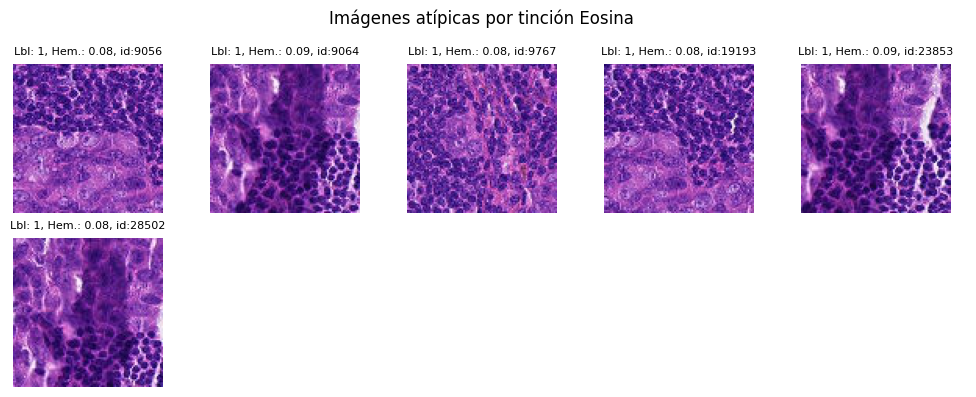

In [105]:
_, _ = visualizar_imgs(dstf, lista_positivos, lista_val_positivos, max_images,macrotitulo)


## Hematoxilina

0.018520720620717697
0.050838859162381254
0.03379310396231857
0.03231813854166356


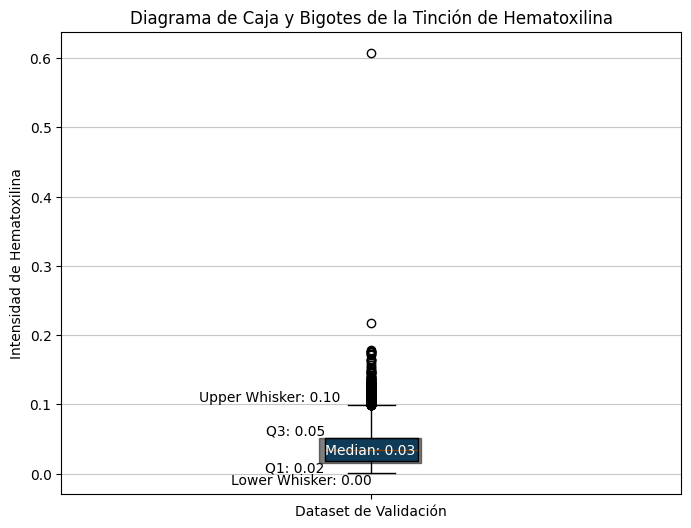

In [106]:
q1=np.percentile(temp_array_h, 25)
print(q1)
q3 = np.percentile(temp_array_h, 75)
print(q3)
mediana = np.median(temp_array_h)
print(mediana)
iqr = q3 - q1
print(iqr)

plt.figure(figsize=(8, 6))
boxplot_dict = plt.boxplot(temp_array_h, patch_artist=True) # Store the boxplot output
plt.title('Diagrama de Caja y Bigotes de la Tinción de Hematoxilina') # Changed title to Eosin
plt.ylabel('Intensidad de Hematoxilina') # Changed label to Eosin
plt.xticks([1], ['Dataset de Validación'])
plt.grid(axis='y', linestyle='-', alpha=0.7)

# Add text annotations for median, quartiles, and whiskers
for line in boxplot_dict['medians']:
    x, y = line.get_xydata()[0]
    plt.text(x, y, f'Median: {y:.2f}', va='center', ha='left', color='white', bbox=dict(facecolor='black', alpha=0.5))

for box in boxplot_dict['boxes']:
    # Get the vertices of the box
    vertices = box.get_path().vertices
    # The vertices correspond to the box corners: (x1, y1), (x2, y1), (x2, y2), (x1, y2)
    # Q1 is the lower y-coordinate, Q3 is the upper y-coordinate
    y1 = vertices[0, 1]
    y2 = vertices[2, 1]
    x = vertices[0, 0] # Use the x-coordinate of the left side of the box

    plt.text(x, y1, f'Q1: {y1:.2f}', va='top', ha='right', color='black')
    plt.text(x, y2, f'Q3: {y2:.2f}', va='bottom', ha='right', color='black')


for i, line in enumerate(boxplot_dict['whiskers']):
    x, y = line.get_xydata()[1] # Get the end point of the whisker
    if i % 2 == 0: # Lower whisker
        plt.text(x, y, f'Lower Whisker: {y:.2f}', va='top', ha='right', color='black')
    else: # Upper whisker
        plt.text(x-0.05, y, f'Upper Whisker: {y:.2f}', va='bottom', ha='right', color='black')
plt.show()


[ 197  322  495 1945 2095 2129 2715 3319 3550 3613]
[0.12711255 0.1207032  0.11117387 0.1150987  0.11954581 0.10938512
 0.12040987 0.12768426 0.08614576 0.11778873]


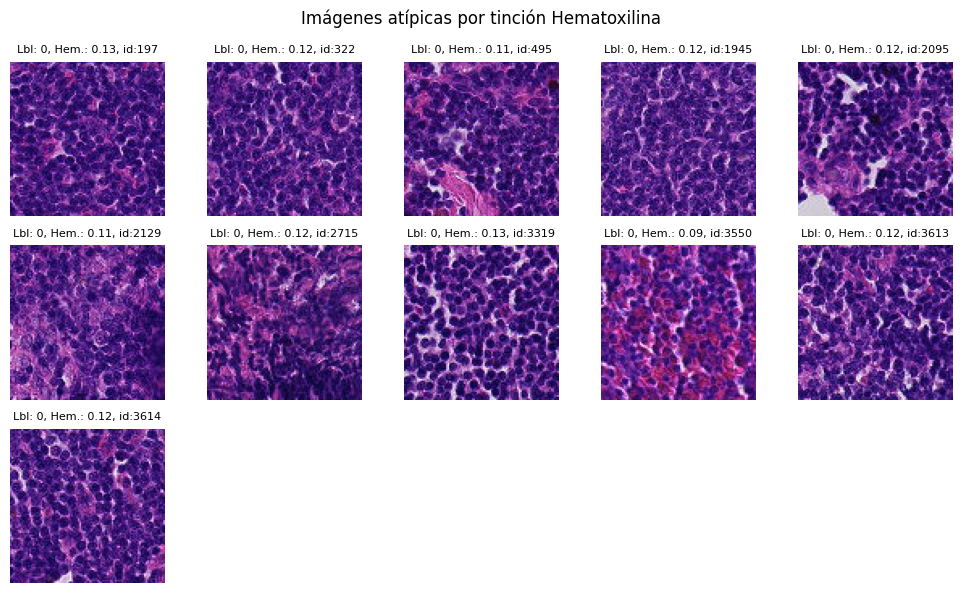

[]
[]


In [107]:
indices_outliers_h = np.where(temp_array_e > (q3 + 1.5 * iqr))
valores_outliers_h = temp_array_h[indices_outliers_h]
print(indices_outliers_h[0][:10])
print(valores_outliers_h[:10])
max_images = 10
macrotitulo = "Hematoxilina"
lista_positivos, lista_val_positivos = visualizar_imgs(dstf, indices_outliers_h, valores_outliers_h, max_images,macrotitulo)
print(lista_positivos)
print(lista_val_positivos)

In [109]:
if len(lista_positivos) > 0:
 _, _ = visualizar_imgs(dstf, lista_positivos, lista_val_positivos, max_images)


# Verificación de tamaño y cantidad de muestras según la etiqueta

In [ ]:
import pandas as pd

In [ ]:
ruta_pcam = base_folder+"/Datasets/pcamelyon_tf/TFcamelyon_val"
dstf = tf.data.Dataset.load(ruta_pcam)
lbls = []
for i,elemento in enumerate(dstf):
  lbl=int(elemento['label'])
  lbls.append(lbl)
lbls_array = np.array(lbls)
cnt_lbls = np.unique(lbls_array, return_counts=True)
lbl_0_val=cnt_lbls[1][0]
lbl_1_val=cnt_lbls[1][1]

In [ ]:
ruta_pcam = base_folder+"/Datasets/pcamelyon_tf/TFcamelyon_test"
dstf = tf.data.Dataset.load(ruta_pcam)
lbls = []
for i,elemento in enumerate(dstf):
  lbl=int(elemento['label'])
  lbls.append(lbl)
lbls_array = np.array(lbls)
cnt_lbls = np.unique(lbls_array, return_counts=True)
lbl_0_test=cnt_lbls[1][0]
lbl_1_test=cnt_lbls[1][1]

In [ ]:
ruta_pcam = base_folder+"/Datasets/pcamelyon_tf/TFcamelyon_train"
dstf = tf.data.Dataset.load(ruta_pcam)
lbls = []
for i,elemento in enumerate(dstf):
  lbl=int(elemento['label'])
  lbls.append(lbl)
lbls_array = np.array(lbls)
cnt_lbls = np.unique(lbls_array, return_counts=True)
lbl_0_train=cnt_lbls[1][0]
lbl_1_train=cnt_lbls[1][1]

In [ ]:
data = {'Etiqueta': ["0", "1", "TOTAL"],
        'Train': [lbl_0_train, lbl_1_train, lbl_0_train + lbl_1_train],
        'Val': [lbl_0_val, lbl_1_val, lbl_0_val + lbl_1_val],
        'Test': [lbl_0_test, lbl_1_test, lbl_0_test + lbl_1_test]}

df_labels = pd.DataFrame(data)

def bold_last_row(row):
    return ['font-weight: bold' if row.name == len(df_labels) - 1 else '' for _ in row]

styled_df = df_labels.style.apply(bold_last_row, axis=1).format({'Train': '{:,.0f}', 'Val': '{:,.0f}', 'Test': '{:,.0f}'})

display(styled_df)


,Etiqueta,Train,Val,Test
0,0,"131,072","16,399","16,391"
1,1,"131,072","16,369","16,377"
2,TOTAL,"262,144","32,768","32,768"
